In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.float_format = '{:,.2f}'.format

In [36]:
df = pd.read_csv('5year.csv')

In [37]:
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_validate

In [41]:
feature_names=pd.read_csv('feature-mapping.csv')
columnList=feature_names.values.tolist()
column=[]
for item in columnList:
    column.append(item[0])
    
df.columns=column

In [42]:
Y = df["bankruptcy_label"]
X = df.drop(["bankruptcy_label"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

In [66]:
feature_columns=[col for col in df.columns if col !="bankruptcy_label"]

for item in feature_columns:
    df[item]=df[item].astype('str')
    df[item]=df[item].apply(lambda x: x.replace('?', '0')).astype('float')


X = df[feature_columns]
y = df['bankruptcy_label']

In [68]:
from sklearn.feature_selection import f_classif

In [71]:
F, pval = f_classif(X.fillna(0),y)

pval_series = pd.Series(pval, index=X.columns)
pval_threshold = 0.01

best_features = pval_series[pval_series<pval_threshold].sort_values()
print(f"There are {len(best_features)} features with p-value less than {pval_threshold}: \n{best_features}")

There are 28 features with p-value less than 0.01: 
logarithm of total assets                                                                                            0.00
short-term liabilities / total assets                                                                                0.00
working capital / total assets                                                                                       0.00
profit on sales / sales                                                                                              0.00
(sales - cost of products sold) / sales                                                                              0.00
(current liabilities * 365) / cost of products sold                                                                  0.00
total costs /total sales                                                                                             0.00
rotation receivables + inventory turnover in days                                             

In [34]:
col = '(current assets - inventories) / long-term liabilities' 
X[col].fillna(X[col].max(), inplace=True)


C:\Users\Oshan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Oshan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Oshan\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\Oshan\anaconda3\lib\site-packages\imblearn\pipeline.py", line 229, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Oshan\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Oshan\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_par

Metrics: 
test_precision   nan
test_recall      nan
test_fbeta       nan
dtype: float64


C:\Users\Oshan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Oshan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Oshan\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\Oshan\anaconda3\lib\site-packages\imblearn\pipeline.py", line 229, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Oshan\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Oshan\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_par

C:\Users\Oshan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Oshan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Oshan\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\Oshan\anaconda3\lib\site-packages\imblearn\pipeline.py", line 229, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Oshan\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Oshan\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_par

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

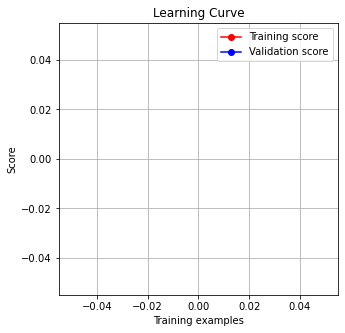

In [35]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from diagnosis import plot_learning_curve

def evaluate_pipeline(pipeline, X_train, y_train, cv):
    """
    Run cross validation for the input pipeline and returns the average precision, recall and F-beta score.
    """
    cv_metrics = cross_validate(pipeline, X_train, y_train, cv=cv, scoring={"precision":"precision", "recall":"recall", "fbeta":make_scorer(fbeta_score, beta=2)})
    cv_metrics_df = pd.DataFrame(cv_metrics)
    average_cv_metrics = cv_metrics_df[["test_precision", "test_recall", "test_fbeta"]].mean()
    return average_cv_metrics


stratified_cv = StratifiedKFold(n_splits=3)

# pipeline components
rus = RandomUnderSampler(random_state=0)
scaler = RobustScaler()
classifier = LogisticRegression(random_state=0, solver="newton-cg", max_iter=200)

pipeline = Pipeline([('rus', rus), ('scaler', scaler),  ("classifier", classifier)])
metrics = evaluate_pipeline(pipeline, X_train, y_train, stratified_cv)
print(f"Metrics: \n{metrics}")

plot_learning_curve(pipeline, X_train, y_train, stratified_cv, make_scorer(fbeta_score, beta=2))

<AxesSubplot:title={'center':'Validation Curve'}, xlabel='classifier__C', ylabel='Score'>

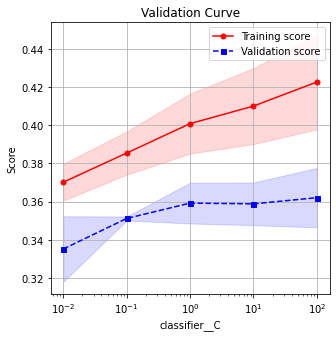

In [25]:
from diagnosis import plot_validation_curve

param_name="classifier__C"
param_range=[0.01, 0.1, 1, 10, 100]

plot_validation_curve(pipeline, X_train, y_train, stratified_cv, make_scorer(fbeta_score, beta=2), param_name, param_range, log_scale=True)